# This notebook is for theory support
## Relationship between $PM_{2.5}$ and Relative Humidity, Windspeed
* > $PM_{2.5} =Background + \sum_{i=0}^2 \alpha_ix_i(x_1=RH,x_2=windspeed)$
* * Reference: Estimating the effects of meteorology on $PM_{2.5}$ reduction during the 2008 Summer Olympic Games in Beijing 

## Relationship between $PM_{2.5}$ and other pollutants
* > $PM_{2.5}=\alpha_1*PM_{10}+\alpha_2*CO+\alpha_3*SO_2+Background $
* * Reference:上海市大气环境中$PM_{2.5}$与其他污染物相关性研究(Relationship between $PM_{2.5}$ and other pollutants in Shanghai atmosphere) 

## Relationship between $PM_{2.5}$ and Rainfall
* > Rainfall will have washout effect to the $PM_{2.5}$. In general， a little bit rainfall will increase the concentration of $PM_{2.5}$. But if the rainfall is big enough, it will reduce $PM_{2.5}$ concentration. We We summarize the relationship between rainfall and $(C_{cur}-C_{fut}) \div (C_{cur})$ as shown below:( $C_{fut}$ means concentration of future and $C_{cur}$ means concentration of current)![Rainfall model](./image/rainfall1.png)

* * Reference: 
* * * The Impact of Meteorological Factors on $PM_{2.5}$ Variations in Hong Kong
* * * 降水和风对大气 $PM_{2.5}$ 、$PM_{10}$ 的清除作用分析(Analysis of the removal effect of precipitation and wind on atmospheric $PM_{2.5}$ and $PM_{10}$)

## Our model
* * Because of the rainfall have a really big impact to our target and rainfall is rare event, so our first model will not include rainfall.$$PM_{2.5} =Background + \sum_{i=0}^5 \alpha_ix_i(x_1=RH,x_2=windspeed,x_3=CO,x_4=NO,x_5=SO_2)$$
## Feasibility Analysis


In [3]:
import pandas as pd
import matplotlib.pylab as plt
import math

def RHcovert(templist,dewlist):
    rh=[]
    for temp,dew in zip(templist,dewlist):
        rh.append(math.exp(17.27*dew/(237.7+dew)-17.27*temp/(237.7+temp)))
    return rh
station=pd.read_csv("./data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
station=station.drop(columns=["No"])
station["RH"]=RHcovert(station["TEMP"],station["DEWP"])

# station=station.drop(columns=["PM10","SO2","NO2","CO","O3","PRES"])
station=station.drop(columns=["TEMP","DEWP","station"])
# station["next"]=(station["PM2.5"].shift(-1)-station["PM2.5"])
station

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,RH
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,1023.0,0.0,NNW,4.4,0.238781
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,1023.2,0.0,N,4.7,0.258810
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,1023.5,0.0,NNW,5.6,0.258810
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,1024.5,0.0,NW,3.1,0.238726
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,1025.2,0.0,N,2.0,0.247379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,1013.5,0.0,NW,2.4,0.119326
35060,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,1013.6,0.0,WNW,0.9,0.138750
35061,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,1014.2,0.0,NW,1.1,0.169628
35062,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,1014.4,0.0,NNW,1.2,0.178775


In [4]:
rain=station[station["RAIN"]!=0]
sunny=station[station["RAIN"]==0]
sunny=sunny.drop(columns=["RAIN"])

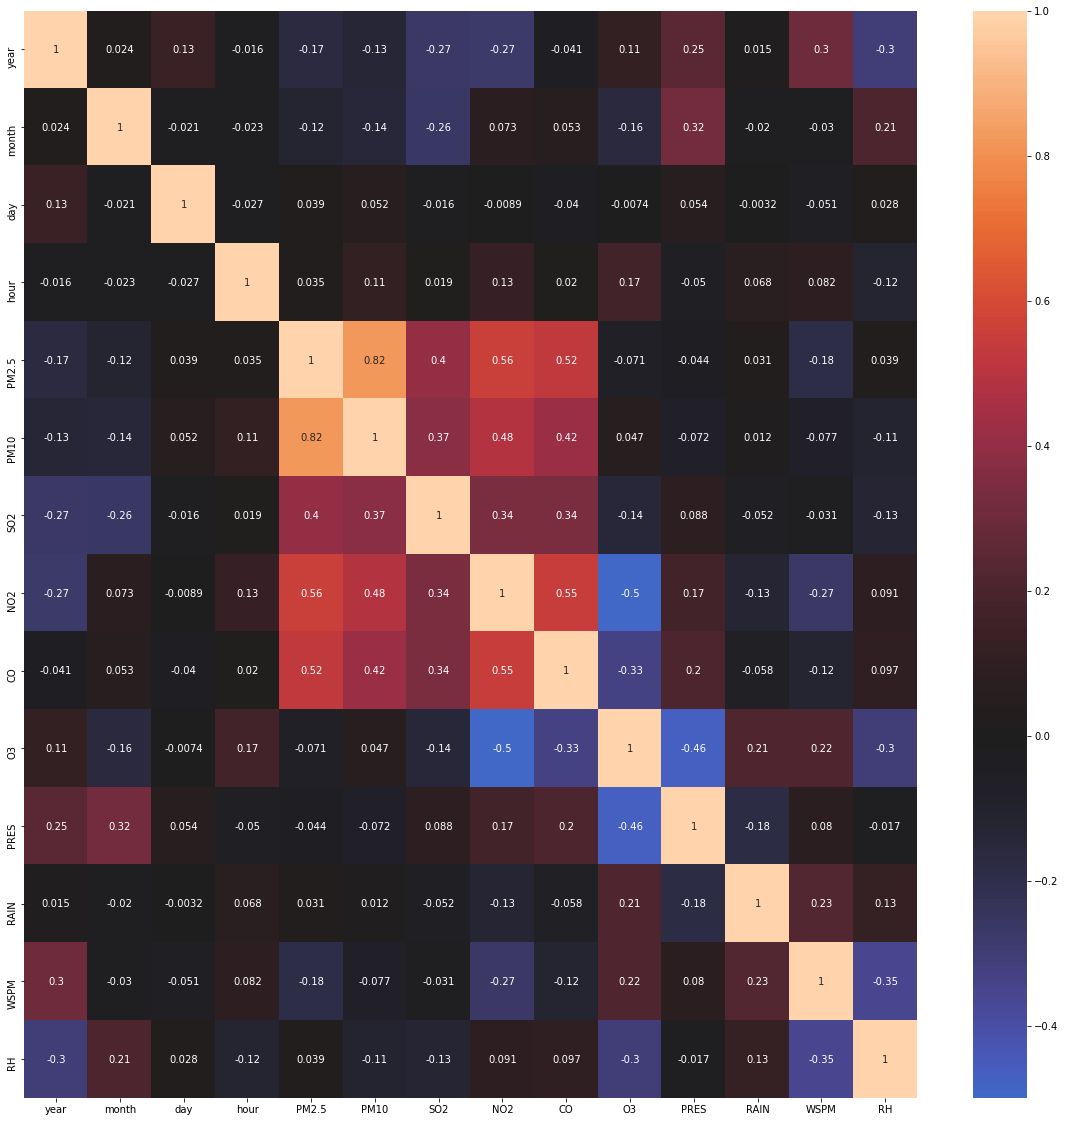

In [6]:
station_corr = rain.corr()
# Visualization
import matplotlib.pyplot as mp, seaborn
fig, ax = plt.subplots(figsize=(20,20)) 
seaborn.heatmap(station_corr, center=0, annot=True)
mp.show()

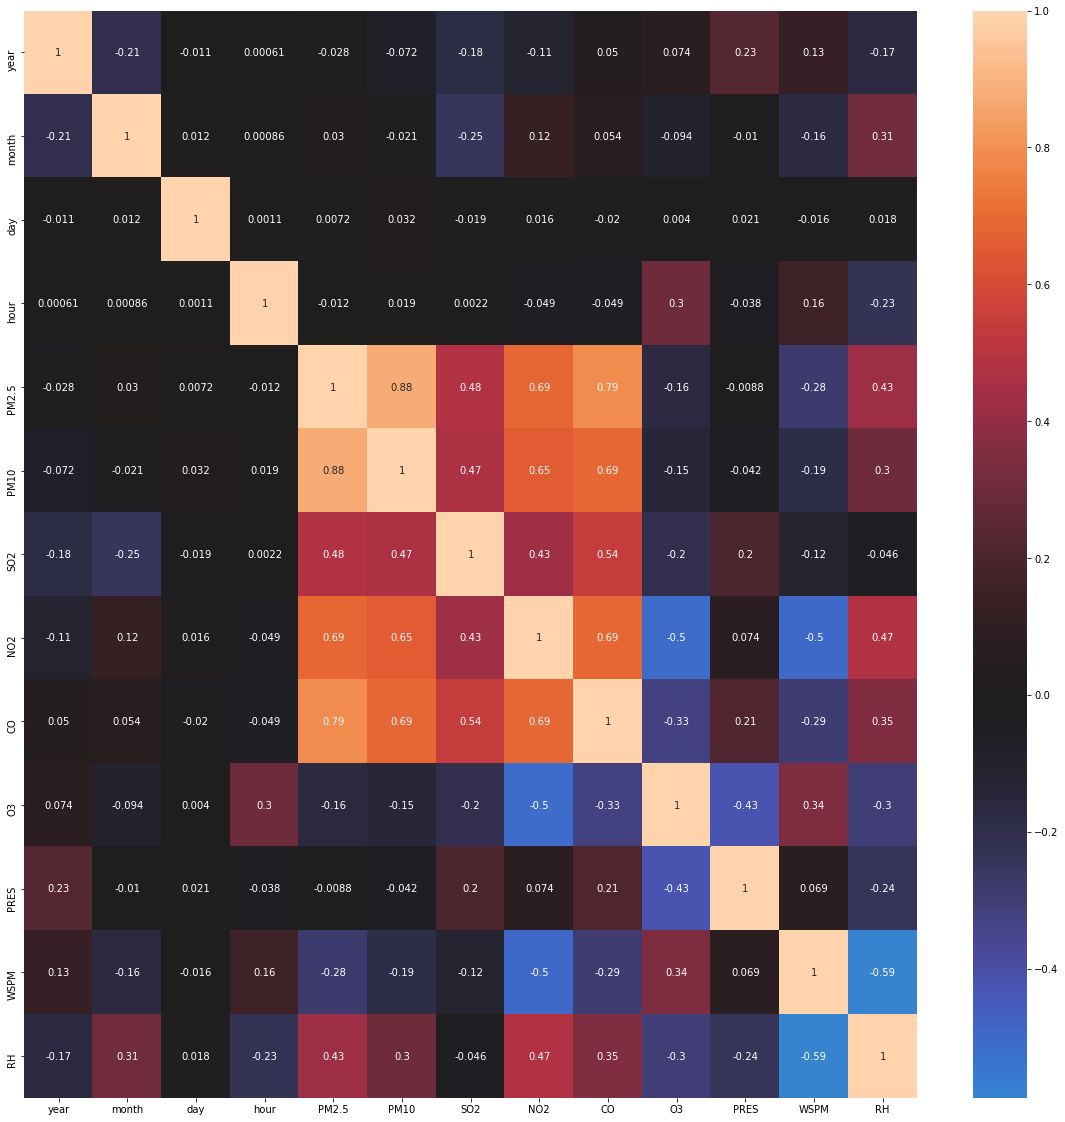

In [7]:
station_corr = sunny.corr()
# Visualization
import matplotlib.pyplot as mp, seaborn
fig, ax = plt.subplots(figsize=(20,20)) 
seaborn.heatmap(station_corr, center=0, annot=True)
mp.show()

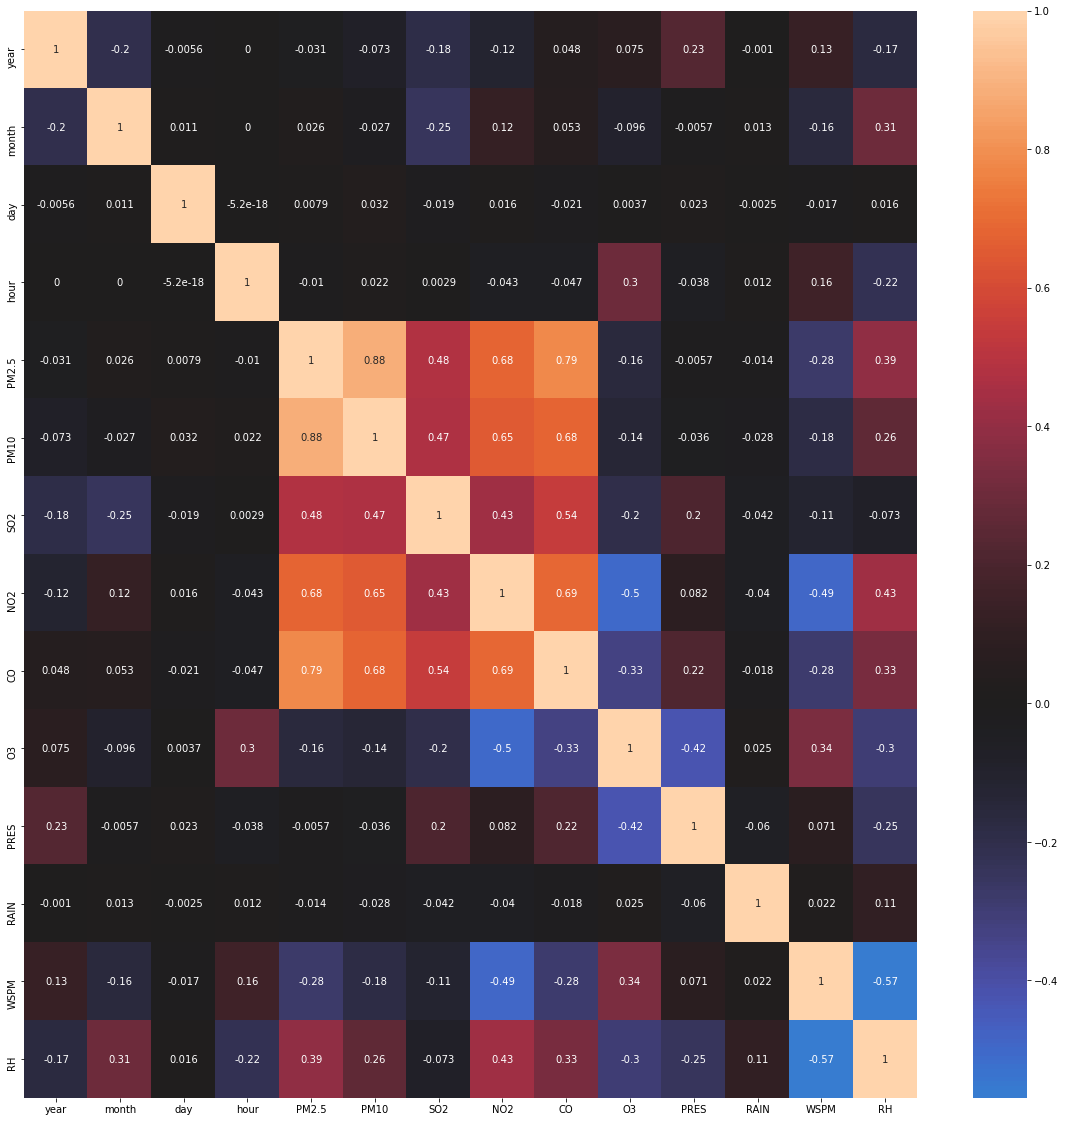

In [8]:
station_corr = station.corr()
# Visualization
import matplotlib.pyplot as mp, seaborn
fig, ax = plt.subplots(figsize=(20,20)) 
seaborn.heatmap(station_corr, center=0, annot=True)
mp.show()

## conclusion
* Correlation analysis shows that PM2.5 has a linear relationship with other meteorological conditions when ignoring rain.